# Content

*  1. Dataset Introduction

*  2. Model Selection

*  3. Data Collection& Preprocessing & EDA
  -  Import Libraries
  - Combine Datasets

*  4. Data Preprocessing & EDA
  - Check Missing values
  - Visualization
  - Outliers

*  5. Feature Selection & Engineering
  - Create Variables
  - Variance Check

*  6. Model Training
  - Train & Test Split
  - Scaling
  - Transfer from 2D to 3D
  - LSTM Model
  - Evaluation
  

*  7. Prediction
  - Train vs Validation Prediction
  - Next 20 days prediction
  - Evaluation

*  8. Conclusion





## 1. Dataset Introduction  

I have a total of 2 datasets:

*   1. Gold_future_train: This dataset was downloaded from Yahoo Finance and includes data from 11/18/2011 to 01/01/2019. It specifically contains the Adjusted Close Price and Date of gold futures.

*   2. Final_USO: This dataset was downloaded from Kaggle (source: https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset). It consists of 1718 rows and 81 columns.

*   My dataset: I decide to perform an inner join between the two datasets. The purpose of this join is to combine the features from Final_USO, which cover the same time period as Gold_future_train (11/18/2011-01/01/2019). I believe that additional indices such as S&P 500 and Gold ETF price included in Final_USO might have an impact on the Gold's Future's Price.


*   Goal:
    To develop a model to predict gold's future's price.

*   Target Variable:
    Gold Future: Adjusted Close Price 
   

## 2. Model Selection


I use the LSTM (Long Short-Term Memory) model for predicting future prices. Therefore, the following data preprocessing is specifically tailored for the LSTM model. There are several reasons why I chose to use the LSTM model:

*   Handle multivariate input by using multiple input nodes and memory cells, allowing for the incorporate them into prediction process

*   Nonlinear relationships: LSTM models are capable of learning and modeling nonlinear relationships between variables and target variables.

*   Robustness to noise& trend: In LSTM models, with the ability to capture long-term trends and patterns, can be more robust to short-term noise and provide more reliable predictions by focusing on patterns










In [1]:
#Mount with Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## 3. Data Collection


*    Import Necessary Libraries

*    Combine Datasets

### 3.1 Import Necessary Libraries

In [2]:
#Install yahoo finance libarary, which we will use later to download data
!pip install yfinance
import yfinance as yf

#For data preprocessing, and linear algebra
import numpy as np 
import pandas as pd 


#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#This allows you to use known-deprecated code without having to see the warning 
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 3.2 Combine Datasets


*   Next I will combine two datasets using inner join




In [3]:
#Dowload past ten years gold futures data
gold_data_train = yf.download('GC=F', start= '2011-11-18', end= '2019-01-01')

[*********************100%***********************]  1 of 1 completed


### **Comment**:

*   Since I know the second dataset we have from kaggle contains data from 11/18/2011 to 01/01/2019, we download the same period data from yahoo finance.

In [4]:
#Export gold_data to csv and name it as 'gold_futures_data.csv'
gold_data_train.to_csv('gold_futures_train_data.csv')

#Rename it as data1 and data2
data1 = pd.read_csv('gold_futures_train_data.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Techniqual DS/FINAL_USO.csv')

In [5]:
#Check data1 column name
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-11-18,1725.000000,1736.000000,1719.000000,1724.699951,1724.699951,14
1,2011-11-21,1704.599976,1704.599976,1674.400024,1678.300049,1678.300049,9
2,2011-11-22,1675.400024,1702.199951,1675.400024,1702.199951,1702.199951,13
3,2011-11-23,1691.199951,1700.000000,1681.599976,1695.699951,1695.699951,34
4,2011-11-25,1690.099976,1693.500000,1675.300049,1685.500000,1685.500000,28


In [6]:
#Check data2 column name
data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [7]:
#Check data information
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786 entries, 0 to 1785
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1786 non-null   object 
 1   Open       1786 non-null   float64
 2   High       1786 non-null   float64
 3   Low        1786 non-null   float64
 4   Close      1786 non-null   float64
 5   Adj Close  1786 non-null   float64
 6   Volume     1786 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 97.8+ KB


In [8]:
#Check data information
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

### **Comment**:

*   I notice that the two datasets have different row numbers. To address this, we will use an inner join operation, connecting the datasets based on the "date" column. To make sure only select the date, which exist in both datasets. 

*   I also notice the Date is object, which need to transfer to datetime later.

*   I also observe the first 7 columns in data2 has duplicated name with data1,which needs to be renamed. 

In [9]:
#Rename data2's first 7 column, which is ETF related variables
new_column_names = {
    'Open': 'ETF_Open',
    'High': 'ETF_High',
    'Low': 'ETF_Low',
    'Close': 'ETF_Close',
    'Adj Close': 'ETF_adjClose',
    'Volume': 'ETF_Volume'
}

data2.rename(columns=new_column_names, inplace=True) #Inplace=True ensures that the changes are made directly to data2

### **Comment**:
 Critiques for me to select deseried columns:

*   In my datasets, "data1" and "data2," there are numerous features, but several of them are duplicates, such as S&P 500 open, close, volume, and adjusted close prices. For this project, my focus is solely on selecting the adjusted close price for all available features. If a particular feature does not have an adjusted close price, I will choose the regular price as a substitute feature.

In [10]:
#Select the desired columns
desired_columns2 = [
    'Date',
    'ETF_adjClose',
    'SP_Ajclose',
    'DJ_Ajclose',
    'EG_Ajclose',
    'EU_Price',
    'OF_Price',
    'OS_Price',
    'SF_Price',
    'USB_Price',
    'PLT_Price',
    'PLD_Price',
    'USDI_Price',
    'GDX_Adj Close',
    'USO_Adj Close'
]
#Use desired_columns as our data2 variables
data2 = data2[desired_columns2]

#Select Date, and Adj Close columns from data1
desired_columns1 = ['Date', 'Adj Close']
data1 = data1[desired_columns1]

In [11]:
#Use inner join to merge data 1 and data 2 on Date column and store it as data
data = data1.merge(data2, how='inner', on='Date', indicator=True)

#Drop _merge column, which is useless
data.drop('_merge',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716 entries, 0 to 1715
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1716 non-null   object 
 1   Adj Close      1716 non-null   float64
 2   ETF_adjClose   1716 non-null   float64
 3   SP_Ajclose     1716 non-null   float64
 4   DJ_Ajclose     1716 non-null   float64
 5   EG_Ajclose     1716 non-null   float64
 6   EU_Price       1716 non-null   float64
 7   OF_Price       1716 non-null   float64
 8   OS_Price       1716 non-null   float64
 9   SF_Price       1716 non-null   int64  
 10  USB_Price      1716 non-null   float64
 11  PLT_Price      1716 non-null   float64
 12  PLD_Price      1716 non-null   float64
 13  USDI_Price     1716 non-null   float64
 14  GDX_Adj Close  1716 non-null   float64
 15  USO_Adj Close  1716 non-null   float64
dtypes: float64(14), int64(1), object(1)
memory usage: 227.9+ KB


## 4. Data Preprocessing & EDA
My Goal in here:

*   Ensure the quality and reliability of the data

*   EDA helps us gain insights into the data, underestand characteristic and identify trend and patterns.

*   Improve model performance






### 4.1 Check Missing Values

In [12]:
#Check for Missing values
data.isnull().sum()

Date             0
Adj Close        0
ETF_adjClose     0
SP_Ajclose       0
DJ_Ajclose       0
EG_Ajclose       0
EU_Price         0
OF_Price         0
OS_Price         0
SF_Price         0
USB_Price        0
PLT_Price        0
PLD_Price        0
USDI_Price       0
GDX_Adj Close    0
USO_Adj Close    0
dtype: int64

In [13]:
#Import datetime libraries 
import datetime as dt

#Make sure the 'Date' column is of datetime type
data['Date'] = pd.to_datetime(data['Date'])

### 4.2 Visualization


*   Get insight from my data


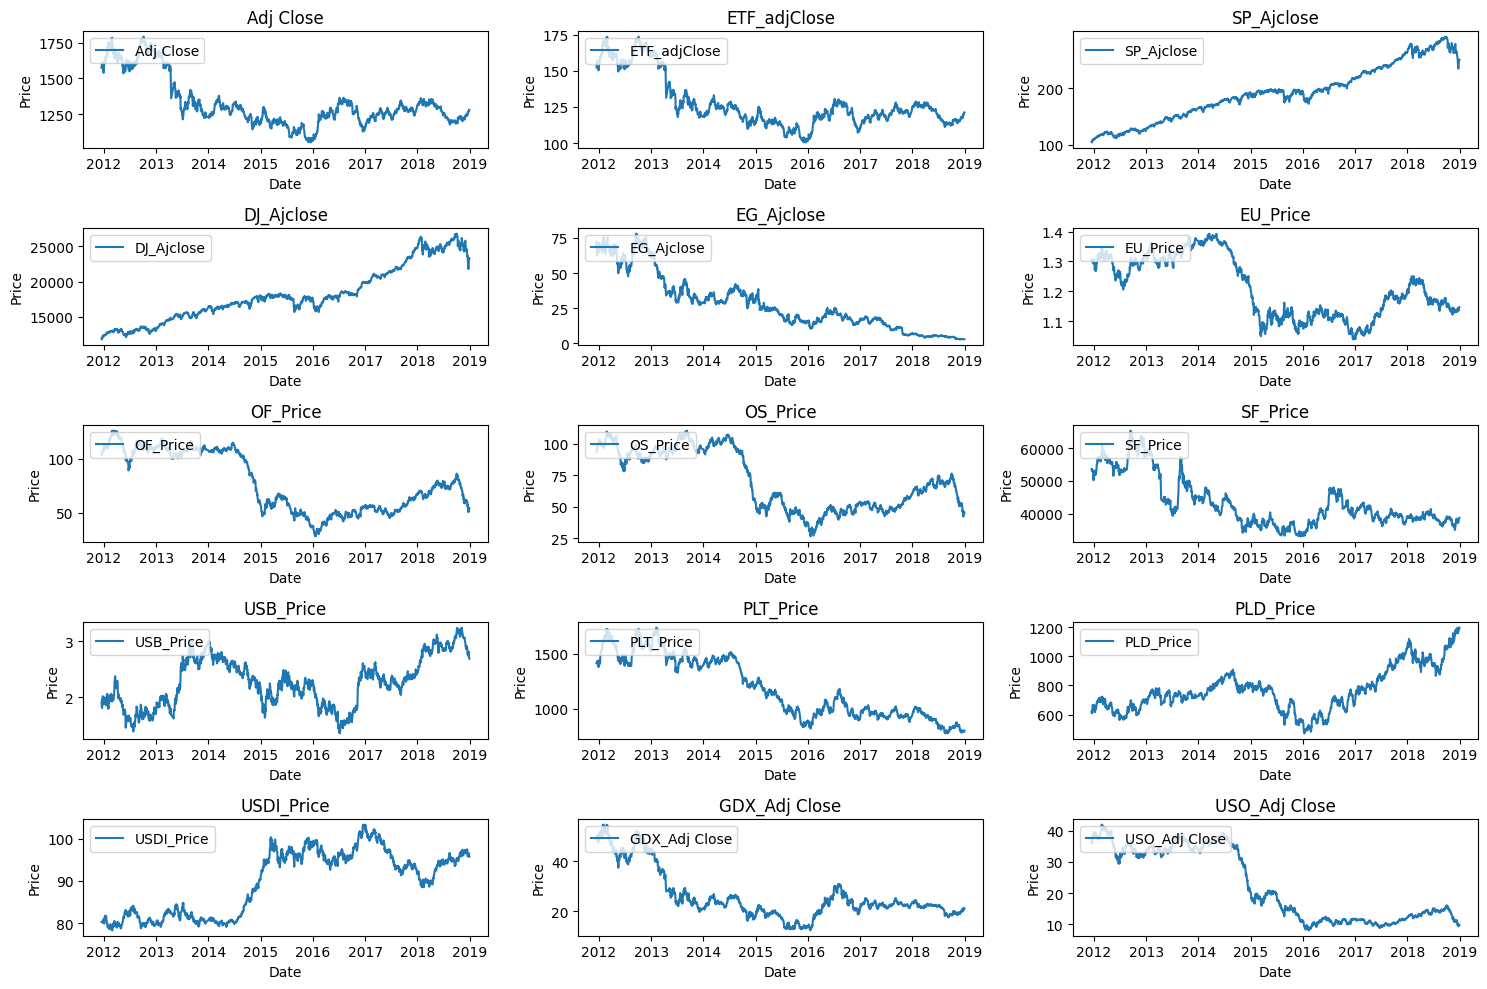

In [14]:
#Visualize historical trend of each variables and target variable

num_columns = len(data.columns) - 1  #Exclude the first column
num_rows = (num_columns - 1) // 3 + 1  #Calculate the number of rows needed based on the number of columns

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 2*num_rows))  #Adjust the figure size and layout

for i, column in enumerate(data.columns[1:]):  #Exclude the first column
    row = i // 3  #Calculate the row index based on the subplot position
    col = i % 3  #Calculate the column index based on the subplot position
    ax = axes[row, col]
    #Plot the historical data for the column
    ax.plot(data['Date'], data[column])
    #Set the title, x-axis label, and y-axis label
    ax.set_title(column)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    #Add a legend for the column
    ax.legend([column], loc='upper left')

#Remove any empty subplots
if num_columns < num_rows * 3:
    for j in range(num_columns, num_rows * 3):
        fig.delaxes(axes[num_rows-1, j % 3])

plt.tight_layout()
plt.show()

### **Comments**

*   Based on the above plots, it is evident that the majority of prices experienced a significant decline between 2015 and 2016, with the exception of the SP 500 and Dow Jones indexes. The possible reaons may include strenthening US dollar, central bank actions, and commodity market volatility. This highlights the importance of conducting a thorough analysis of historical data and staying informed about relevant news and events in order to make accurate price predictions.
*   We also can group the trend of our variables and target variables into 3 groups: 
      - The price initially experienced a downward trend until 2016, followed by a slight upward movement. Subsequently, it exhibited some fluctuations, albeit minor in nature.: Adj Close, ETF_adjClose, EG_ajClose,Eu_Price, OF_Price, OS_Price, SF_Price,PLT_Price, and USO_adj Close.

      - The price constantly goes up with a little flucuation: SP_adjClose, DJ_adjClose.

      - The price flucuates in a certain period: USB_Price, and USDI_Price.


In [15]:
'''
We transfer the Date column to be the index in this step. 
This allows for easier slicing of the data and eliminates the need for an additional separate column dedicated to date information.
We perform this transformation at this stage to improve the efficiency of visualization, 
as it would take longer to generate visualizations using the index in its original form.
'''
data.index = data.pop('Date')

#Check data
data

,Adj Close,ETF_adjClose,SP_Ajclose,DJ_Ajclose,EG_Ajclose,EU_Price,OF_Price,OS_Price,SF_Price,USB_Price,PLT_Price,PLD_Price,USDI_Price,GDX_Adj Close,USO_Adj Close
Date,,,,,,,,,,,,,,,
2011-12-15,1574.599976,152.330002,105.441238,11868.80957,70.431755,1.3018,105.09,93.42,53604,1.911,1414.65,618.85,80.341,48.973877,36.130001
2011-12-16,1595.599976,155.229996,105.597549,11866.38965,72.364037,1.3035,103.35,93.79,53458,1.851,1420.25,623.65,80.249,49.921513,36.270000
2011-12-19,1594.400024,154.869995,104.468536,11766.25977,62.509384,1.2995,103.64,94.09,52961,1.810,1411.10,608.80,80.207,48.490578,36.200001
2011-12-20,1615.599976,156.979996,107.629784,12103.58008,64.731514,1.3079,106.73,95.55,53487,1.927,1434.75,626.65,80.273,50.215282,37.560001
2011-12-21,1611.900024,157.160004,107.838242,12107.74023,66.180725,1.3045,107.71,99.01,53148,1.970,1429.05,635.90,80.350,50.186852,38.110001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,1267.500000,120.019997,234.339996,21792.19922,2.950000,1.1400,50.47,42.27,37541,2.736,788.40,1172.80,96.007,21.090000,9.290000
2018-12-26,1269.199951,119.660004,246.179993,22878.44922,3.000000,1.1353,54.47,46.39,38253,2.810,799.25,1190.10,96.568,20.620001,9.900000
2018-12-27,1277.300049,120.570000,248.070007,23138.82031,2.950000,1.1430,52.16,45.23,38690,2.774,795.50,1196.00,96.001,20.969999,9.620000


### 4.3 Use Box Plot to Check Outliers

*   Because I want a more accurate odel and reduce the impact of noise. Thus, I need to deal with outliers.

*  Instead of outright deletion, we will address outliers using the Interquartile Range (IQR) method. Outliers will be detected by assessing their deviation from the IQR, and subsequently, they will be either replaced or adjusted within the range determined by the IQR.




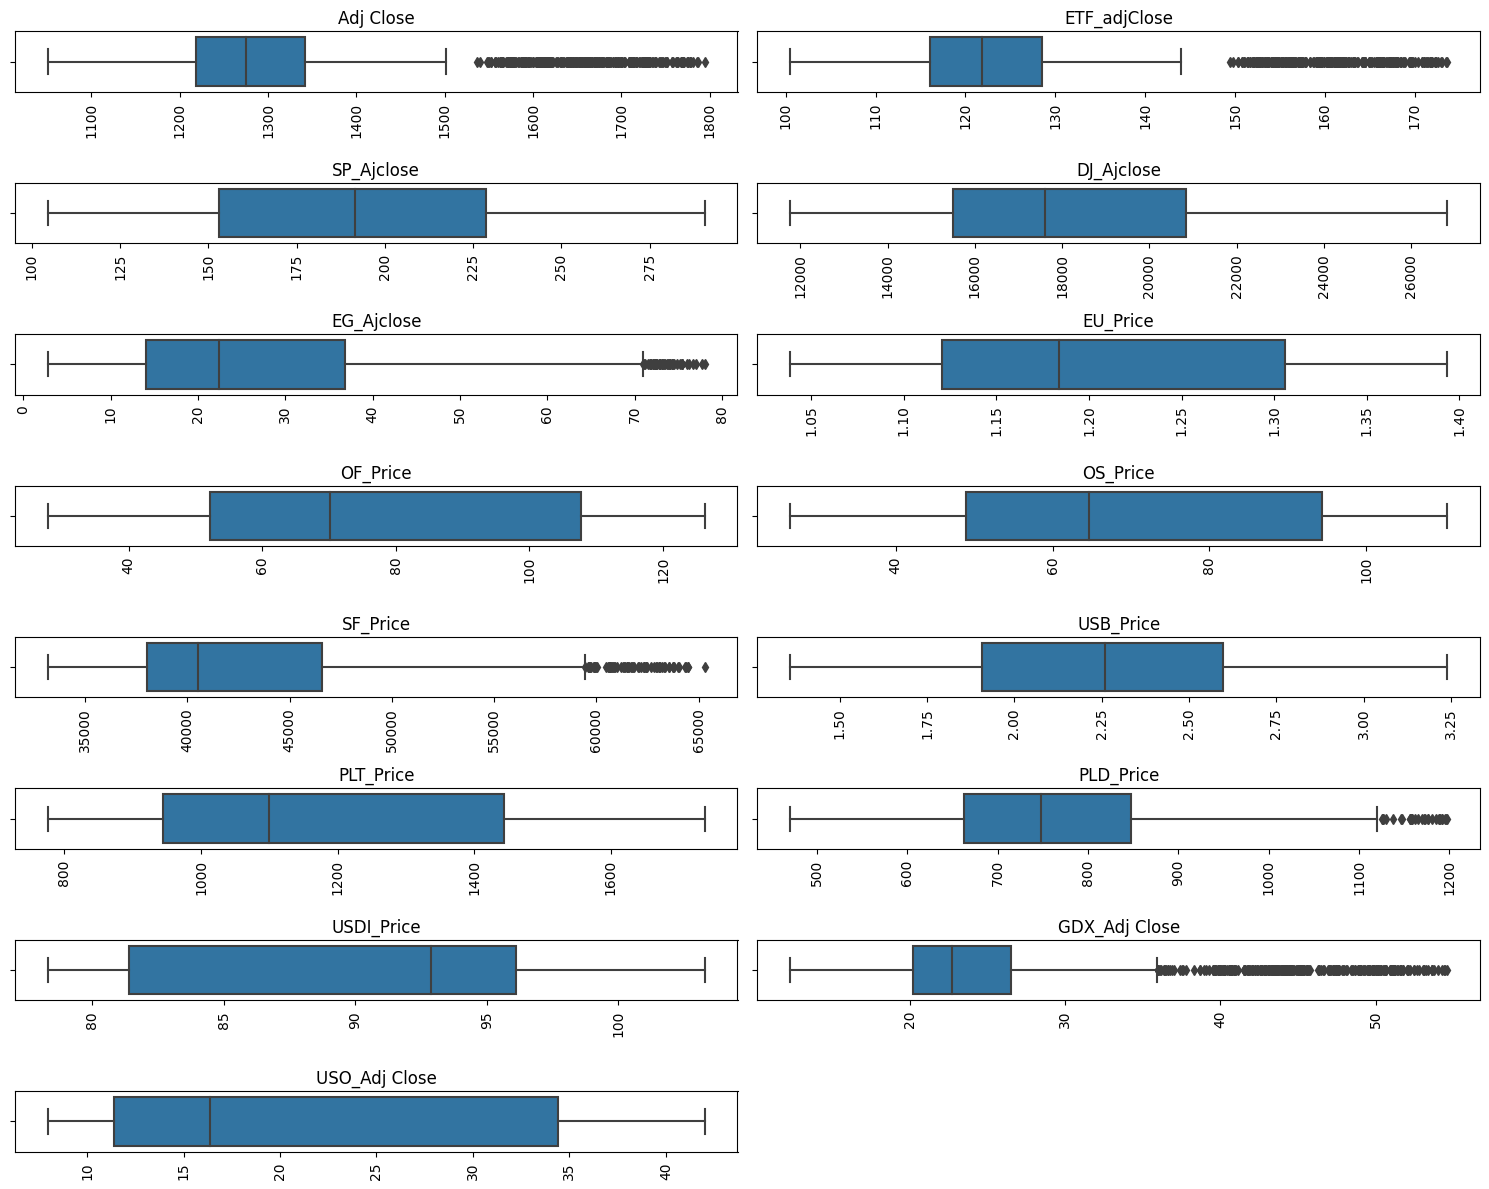

In [16]:
#Check the distribution and outliers by using Boxplot
columns_of_interest = data.columns
 
#Determine the number of subplots needed & how many subplots every row
num_subplots = len(columns_of_interest)
num_rows = (num_subplots + 1) // 2
num_cols = 2

#Determine the size of the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 1.5))
fig.subplots_adjust(hspace=0.3)

#Iterate over each column and create a boxplot
for i, column in enumerate(columns_of_interest):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.boxplot(data[column], ax=ax, orient='h')
    
    #Set title, label, and format
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticklabels([])
    ax.tick_params(axis='x', rotation=90)

#Remove any empty subplots
if num_columns < num_rows * 2:
    for j in range(num_columns, num_rows * 2):
        fig.delaxes(axes[num_rows-1, j % 2])

#Show the plots
plt.tight_layout()
plt.show()

### **Comment**:


*   The outliers in the dataset were managed by employing the Interquartile Range (IQR) technique, wherein any observations falling outside the range defined by the first quartile minus 1.5 times the IQR and the third quartile plus 1.5 times the IQR were identified as outliers. 

*   Based on the graph above, it is evident that there is a significant presence of outliers. The number of outliers is not insignificant; rather, it is quite substantial. Rather than simply deleting these outliers outright, I have decided to employ the interquartile range (IQR) method to constrain them within a specified range.
 

In [17]:
#Defines a function called mod_outlier that handles outliers in a DataFrame called data
def mod_outlier(data):
  #Create a copy to avoid modifying the original data
    df = data.copy()

  #Calculate IQR
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
  #The function then iterates over each column to replace any values below the lower bound and above the upper bound
    for col in df.columns:
        df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
        df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])

    return df
#Use the mod_outlier function to our data and store them
data = mod_outlier(data)

## 5. Feature Engineering & Feature Selecting


*    Feature Engineering- Create Variables: 
     - Return 
     - Moving Average

*    Feature selection: Variance Threshold Check












### 5.1.1 Return

In [18]:

''' Now we will create a new column called "return" 
to examine the price return and determine its stationarity.
 This column will also be utilized in predicting our target variable.'''

data['Return'] = data['Adj Close'].pct_change()
data = data.dropna()

#Convert the value from numerical to percentage
data['Return'] = data['Return'] * 100 

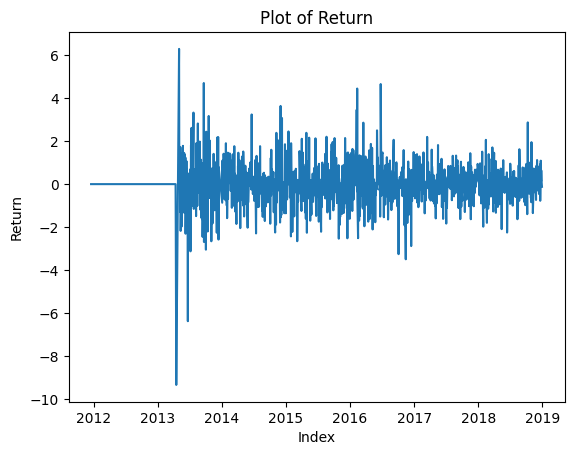

In [19]:
#Plot the return
return_data = data['Return']

#Plot the 'return' data
plt.plot(return_data)

#Add labels and title
plt.xlabel('Index')
plt.ylabel('Return')
plt.title('Plot of Return')

#Display the plot
plt.show()

### **Comment**:

*   Checking the graph, I found the return is stationary, which will help me to catch up the trend, so I will store the Return column.

### 5.1.2 Moving Average

*   Using moving averages for future's price helps in smoothing out short-term fluctuations and identifying the underlying trends. It provides a clearer picture of the overall price movement by averaging out the price data over a specific period. 

*   My objective is to minimize noise and emphasize the long-term trend. To achieve this, I am employing moving averages. In this case, I will experiment with moving averages of 10, 20, and 50 days to identify the most suitable one that offers a smoother fluctuation while capturing the desired trend.






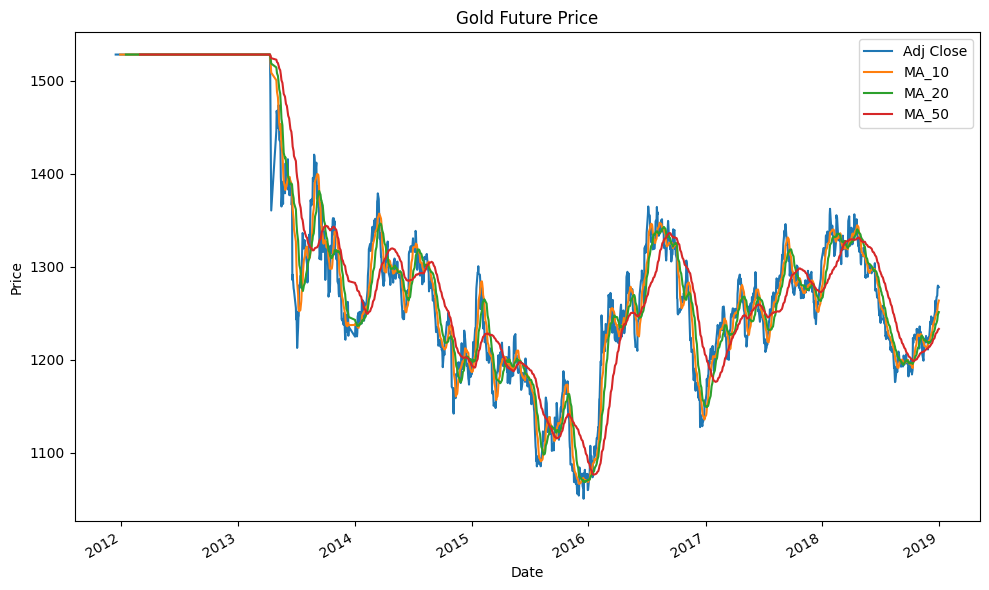

In [20]:
#I want to Plot the Moving Average within 10,30,50 days

#Create a list, containing the desired moving average periods
ma_day = [10, 20, 50]

#Iterates over each value in ma_day
for ma in ma_day:
    #Creates a column name (column_name) for the moving average based on the current period (ma).
    column_name = f"MA_{ma}"
    #Calculates the moving average by taking the rolling mean of the 'Adj Close' column with the specified period (ma).
    #Adds the calculated moving average values as a new column in the data DataFrame.
    data[column_name] = data['Adj Close'].rolling(ma).mean()
        
#Define size, title, and label
fig, ax = plt.subplots(figsize=(10, 6))

data[['Adj Close', 'MA_10', 'MA_20', 'MA_50']].plot(ax=ax)
ax.set_title('Gold Future Price')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.tight_layout()
plt.show()

### **Comment**:

*   Checking the graph, we found when moving average euqal 20, it can smooth our data, without changing the trend. Therefore we will add moving average=20 as our new feature, and drop the other two, and nah rows.

In [21]:
#Drop useless column, and rows contain Nah 
data = data.drop(['MA_10', 'MA_50'], axis=1)
data = data.dropna()
#Double check new columns information
data.iloc[:, 16].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1696 entries, 2012-01-17 to 2018-12-31
Series name: MA_20
Non-Null Count  Dtype  
--------------  -----  
1696 non-null   float64
dtypes: float64(1)
memory usage: 26.5 KB


## 5.2 Feature Selection


*   Variance threshold: it removes all variables which variance doesn't meet threshold. we set two variance thresholds, 0 and 0.05. I will use a counter and a for loop to iterate through the variables and calculate their variances. If a vairable has a variance below the threshold, it is considered either a constant variable or a quasi-constant variablese (with variance similar to 95% of the data).

*   I want to remove quasi-constant variables for reducing computational overhead, since the deep learning model needs to run by times. These quasi-constant provide no useful information for modeling process.







### Variance Threshold Check



In [22]:
#Import libraries
import collections
from sklearn.feature_selection import VarianceThreshold

#Setting variance threshold to 0 which means features that have same value in all samples.
sel_const = VarianceThreshold(threshold=0)
# Find the quasi-constant variance features (with 95% of the same data)
sel_qsi_const = VarianceThreshold(threshold=0.05)

#Fit the constant, and quasi-constant to train_num
sel_const.fit(data)
sel_qsi_const.fit(data)

#Get_support() return True and False value for each feature.
#True: Not a constant feature
#False: Constant feature(It contains same value in all samples.)
ret_const = sel_const.get_support()
ret_qsi_const = sel_qsi_const.get_support()

#Return the columns that did not meet the threshold
const_columns = [col for col in data.columns if col not in\
               data.columns[ret_const]]

qsi_const_columns = [col for col in data.columns if col not\
                     in data.columns[ret_qsi_const]]

print(f"Number of features that are retained\
 after constant variance check: {sum(ret_const)}")
print(f"Number of features that are retained\
 after quasi_constant variance check: {sum(ret_qsi_const)}")
print(f"The variables that have about 95% of constant\
 values are: {qsi_const_columns}")

Number of features that are retained after constant variance check: 17
Number of features that are retained after quasi_constant variance check: 16
The variables that have about 95% of constant values are: ['EU_Price']


In [23]:
#Since the EU_price haven't through the variancethreshold test, so we drop it
data = data.drop('EU_Price', axis=1)

In [24]:
#Check
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1696 entries, 2012-01-17 to 2018-12-31
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Adj Close      1696 non-null   float64
 1   ETF_adjClose   1696 non-null   float64
 2   SP_Ajclose     1696 non-null   float64
 3   DJ_Ajclose     1696 non-null   float64
 4   EG_Ajclose     1696 non-null   float64
 5   OF_Price       1696 non-null   float64
 6   OS_Price       1696 non-null   float64
 7   SF_Price       1696 non-null   float64
 8   USB_Price      1696 non-null   float64
 9   PLT_Price      1696 non-null   float64
 10  PLD_Price      1696 non-null   float64
 11  USDI_Price     1696 non-null   float64
 12  GDX_Adj Close  1696 non-null   float64
 13  USO_Adj Close  1696 non-null   float64
 14  Return         1696 non-null   float64
 15  MA_20          1696 non-null   float64
dtypes: float64(16)
memory usage: 225.2 KB


## 6. Model Training

In this step, I will train my model to make it more accurately predict the price
*    Train& Test Split
*    Scalling
*    Transfer to 3 dimension
*    Train Model
# *    Evaluate Loss








### 6.1 Train& Test Split

*   I split 20% data to test data and the rest of 80% to train




In [25]:
#Calculate the size of 20% dataset
test_split = round(len(data)*0.20)
test_split

339

In [26]:
#Train& Test Split
train_data = data[:-337]
test_data = data[-337:]

#Check data shape
print(train_data.shape)
print(test_data.shape)

(1359, 16)
(337, 16)


## 6.2 Scaling

*   Scaling is a preprocessing technique used to standardize or normalize the variables of a dataset. It involves transforming the values of the variables to a specific range or distribution. 

*   We scale our dataset to a range of 0 and 1 to ensure that all variables are on a similar scale. This prevents certain variables with larger values from dominating the model's learning process. In our dataset, we have a wide range of values. For example, the 'Adj Close' price has values exceeding 1000, while the 'Return' variable has values around the decimal range. Scaling the data to a common range helps in maintaining relative importance of variables regardless of their original scale.

In [27]:
#Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
#Set range from 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))
# Use fit_transform to scale the training data, which calculates the scaling parameters 
train_scaled = scaler.fit_transform(train_data)

# The transform method applies the same scaling transformation to the testing data 
test_scaled = scaler.transform(test_data)

# Check the training_scaled array
train_scaled

array([[1.        , 1.        , 0.00456587, ..., 0.90543327, 0.59759066,
        1.        ],
       [1.        , 1.        , 0.01418736, ..., 0.90660804, 0.59759066,
        1.        ],
       [1.        , 1.        , 0.01882971, ..., 0.90249635, 0.59759066,
        1.        ],
       ...,
       [0.49350642, 0.47185041, 0.96402215, ..., 0.04875184, 0.64512244,
        0.42976405],
       [0.49203999, 0.46777359, 0.96116198, ..., 0.05903084, 0.59411382,
        0.43421603],
       [0.50272306, 0.47764402, 0.96259189, ..., 0.05139501, 0.62293356,
        0.43818908]])

## 6.3 Transfer data to 3 Dimensional


*   LSTM (Long Short-Term Memory) models in deep learning are designed to process sequential data, which typically consists of a sequence of time steps. LSTM models expect input data to be in the form of a 3-dimensional array, commonly referred to as (batch_size, time_steps, features)

*   I want to transfer my data from 2D to 3D by defining a function called createXY that creates input-output pairs from a given dataset.



In [28]:
def createXY(dataset, n_past):
    dataX = []  #List to store input sequences
    dataY = []  #List to store corresponding output values

    #Iterate over the dataset starting from the n_past index
    for i in range(n_past, len(dataset)):
        #Create input sequence by slicing the dataset from i-n_past to i (exclusive)
        dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
        #Append the output value from the current time step to dataY
        dataY.append(dataset[i, 0])
    
    #Convert the dataX and dataY lists into NumPy arrays and return them
    return np.array(dataX), np.array(dataY)

trainX,trainY=createXY(train_scaled,20)
testX,testY=createXY(test_scaled,20)

In [29]:
#Check the shape
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (1339, 20, 16)
trainY Shape--  (1339,)


In [30]:
#Check the shape
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (317, 20, 16)
testY Shape--  (317,)


## 6.4 Train Model


*   I use KerasRegressor and GridSearchCV from scikit-learn for hyperparameter tuning of a sequential LSTM model in TensorFlow/Keras.

*   Given the high correlation among many of my features, I anticipated the possibility of overfitting. To mitigate this issue, I use dropout layers. The techniques aim to address overfitting, enhance the model's generalization, and promote more robust predictions.

In [31]:
#Install tensorflow
!pip install -q tensorflow

In [35]:
#Imports necessary libraries and modules for building a regression model using Keras and TensorFlow
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras.layers import LSTM, Dropout, Dense

#Defining the model-building function
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50, return_sequences=True, input_shape=(20, 16)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss='mse', optimizer=optimizer)
    return grid_model

#Creating an instance of KerasRegressor
grid_model = KerasRegressor(build_fn=build_model, verbose=1, validation_data=(testX, testY))

#Defining the hyperparameter grid for later finding the optimal hyperparameter
parameters = {
    'batch_size': [16, 20],
    'epochs': [8, 10],
    'optimizer': ['adam', 'Adadelta'],
}

#Performing grid search cross-validation
grid_search = GridSearchCV(estimator=grid_model, param_grid=parameters, cv=2)

### **Comment**:


*   The following code import time library to set a start and end_time to calculate the run time by minutes




In [36]:
#Import time module to measure the execution time.
import time
#Records the starting time using time.time() and assigns it to the variable start_time
start_time = time.time()

#Sets up a grid search to find the optimal hyperparameters for the LSTM model
grid_search = grid_search.fit(trainX,trainY)

#Record end time
end_time = time.time()
running_time = end_time - start_time

print("Running time:", running_time/60, "minutes")

Epoch 1/8
42/42 [==============================] - 11s 65ms/step - loss: 0.0208 - val_loss: 0.0096
Epoch 2/8
42/42 [==============================] - 2s 37ms/step - loss: 0.0048 - val_loss: 0.0143
Epoch 3/8
42/42 [==============================] - 1s 32ms/step - loss: 0.0039 - val_loss: 0.0115
Epoch 4/8
42/42 [==============================] - 1s 27ms/step - loss: 0.0032 - val_loss: 0.0072
Epoch 5/8
42/42 [==============================] - 1s 33ms/step - loss: 0.0033 - val_loss: 0.0067
Epoch 6/8
42/42 [==============================] - 2s 36ms/step - loss: 0.0028 - val_loss: 0.0047
Epoch 7/8
42/42 [==============================] - 1s 29ms/step - loss: 0.0025 - val_loss: 0.0054
Epoch 8/8
42/42 [==============================] - 0s 7ms/step - loss: 0.0501
Epoch 1/8
42/42 [==============================] - 65s 1s/step - loss: 0.0799 - val_loss: 0.0663
Epoch 2/8
42/42 [==============================] - 1s 29ms/step - loss: 0.0100 - val_loss: 0.0584
Epoch 3/8
42/42 [=======================

In [37]:
#Find the optimal hyperparameter
grid_search.best_params_

{'batch_size': 20, 'epochs': 8, 'optimizer': 'adam'}

In [38]:
#my_model is assigned the value of the best model found
my_model = grid_search.best_estimator_.model

In [39]:
#Fit the best model to the training data for later print train and test Loss
history = my_model.fit(trainX, trainY, epochs=8, batch_size=16, validation_data=(testX, testY))

Epoch 1/8
84/84 [==============================] - 2s 28ms/step - loss: 0.0039 - val_loss: 0.0031
Epoch 2/8
84/84 [==============================] - 2s 27ms/step - loss: 0.0040 - val_loss: 0.0014
Epoch 3/8
84/84 [==============================] - 3s 32ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 4/8
84/84 [==============================] - 3s 34ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 5/8
84/84 [==============================] - 2s 27ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 6/8
84/84 [==============================] - 2s 26ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 7/8
84/84 [==============================] - 3s 35ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 8/8
84/84 [==============================] - 4s 46ms/step - loss: 0.0027 - val_loss: 0.0012


### **Comment**:


*   From the grid_search we found the best hyperparameter for my model is: {'batch_size': 16, 'epochs': 8, 'l2_reg': 0.001, 'optimizer': 'adam'}.

*   Also, the run time is around 7.5 minutes.



## 6.5 Evaluation


*   I use the MSE(Mean Squared Error) as my evaluation method, because MSE is commonly used as an evaluation method for stock price prediction and other regression tasks. The following reasons are:
       - By emphasizing larger errors, MSE provides a more conservative evaluation of the model's performance.

       - MSE is sensitive to outliers due to the squaring of errors. 
       
       - MSE has several desirable mathematical properties, such as being non-negative, symmetric, and having a unique minimum. 








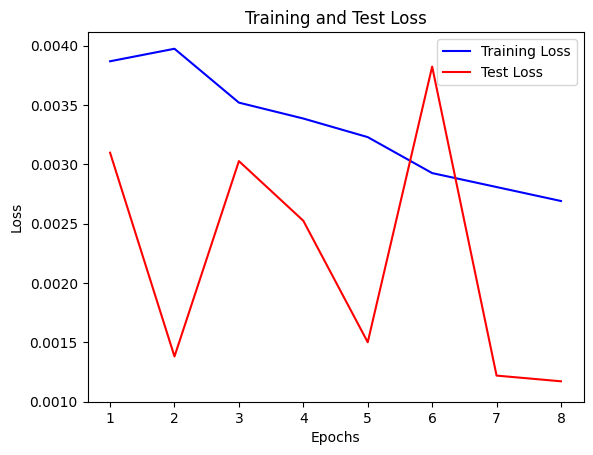

In [50]:
#Plot the historical 8 epoch result
#Extract the training and validation loss from the history
loss = history.history['loss']
val_loss = history.history['val_loss']

#Create a range of epochs for the x-axis of the plot
epochs = range(1, len(loss) + 1)

#Plot the training loss in blue and the validation loss in red
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Test Loss')

#Add labels and title to the plot
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

#Add a legend to differentiate the training and validation loss lines
plt.legend()

plt.ylim(0.001)  # Set the y-axis limit to 0.001

#Display the plot
plt.show()

### **Comment**:


*   From the above graph, although it is very flucuated in the test loss, but the unit is 0.001. Therefore, the MSE is still very small.

*   Every time the epoch for traiing loss is keeping improving, and reduce my error.



## 7. Prediction


*  I will use it to make prediction about future's price, scale back my train and test data.




In [41]:
# Make prediction using the trained model-'my_model' on test data
prediction = my_model.predict(testX)
# print the prediction and shape
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

10/10 [==============================] - 2s 11ms/step
prediction
 [[0.5274252 ]
 [0.5222441 ]
 [0.50833964]
 [0.5026698 ]
 [0.5073558 ]
 [0.5049747 ]
 [0.49507627]
 [0.48989293]
 [0.4837843 ]
 [0.47548482]
 [0.47285342]
 [0.46939424]
 [0.4695587 ]
 [0.47714502]
 [0.4876206 ]
 [0.49514052]
 [0.50495934]
 [0.51675016]
 [0.5206373 ]
 [0.513473  ]
 [0.5045142 ]
 [0.5019703 ]
 [0.4946048 ]
 [0.4886776 ]
 [0.48211548]
 [0.47736067]
 [0.46766046]
 [0.46246633]
 [0.4634276 ]
 [0.46154743]
 [0.4656233 ]
 [0.4699407 ]
 [0.46844637]
 [0.4747874 ]
 [0.47575873]
 [0.4807774 ]
 [0.48580152]
 [0.4804199 ]
 [0.47810847]
 [0.4793717 ]
 [0.4793901 ]
 [0.4800553 ]
 [0.49039546]
 [0.4857417 ]
 [0.48592594]
 [0.49268475]
 [0.49474064]
 [0.5001452 ]
 [0.5039685 ]
 [0.49822748]
 [0.48820496]
 [0.48510134]
 [0.4799066 ]
 [0.46941572]
 [0.46305585]
 [0.45183563]
 [0.44198897]
 [0.43396756]
 [0.42679995]
 [0.43072754]
 [0.43973085]
 [0.44623926]
 [0.4546136 ]
 [0.45887503]
 [0.46424085]
 [0.46885738]
 [0.476674

In [42]:
#Creates an array prediction_copies_array by repeating the elements of the prediction array along the specified axis.
train_array = np.repeat(prediction,16, axis=1) # 16 number of times each element of prediction should be repeted

In [43]:
# Check the shape
train_array.shape

(317, 16)

In [44]:
#Performs inverse scaling on the prediction_copies_array array using a scaler object (scaler) and reshapes it to obtain the final prediction values.
Predicted_value=scaler.inverse_transform(np.reshape(train_array,(len(prediction),16)))[:,0] # [:,0] select the only the first column

In [45]:
#Obtain the actual values of the test data after inverse scaling.
test_array = np.repeat(testY,16, axis=-1)
#Represents the actual values of the test data in their original scale
Actual_value=scaler.inverse_transform(np.reshape(test_array,(len(testY),16)))[:,0]

In [46]:
print("Pred Values-- " ,Predicted_value)
print("\nOriginal Values-- " ,Actual_value)

Pred Values--  [1302.5929 1300.1194 1293.4813 1290.7745 1293.0117 1291.875  1287.1495
 1284.6749 1281.7587 1277.7965 1276.5403 1274.8888 1274.9674 1278.5891
 1283.5901 1287.1802 1291.8676 1297.4966 1299.3523 1295.932  1291.6552
 1290.4407 1286.9243 1284.0947 1280.9619 1278.692  1274.0612 1271.5815
 1272.0404 1271.1428 1273.0886 1275.1497 1274.4364 1277.4636 1277.9272
 1280.3232 1282.7218 1280.1525 1279.0491 1279.6521 1279.6609 1279.9784
 1284.9149 1282.6932 1282.781  1286.0078 1286.9893 1289.5693 1291.3945
 1288.6539 1283.869  1282.3875 1279.9075 1274.8992 1271.8629 1266.5063
 1261.8055 1257.9762 1254.5543 1256.4294 1260.7275 1263.8346 1267.8326
 1269.8671 1272.4287 1274.6326 1278.3643 1283.5638 1288.6039 1293.6617
 1299.864  1306.3113 1310.2732 1313.5    1314.9279 1314.401  1310.791
 1308.499  1307.763  1312.6569 1317.6766 1320.9169 1319.2637 1318.9377
 1318.0138 1319.0945 1325.8876 1330.9989 1326.1296 1323.3872 1322.3862
 1317.9088 1315.1165 1309.7657 1302.0044 1297.5011 1294.1012 12

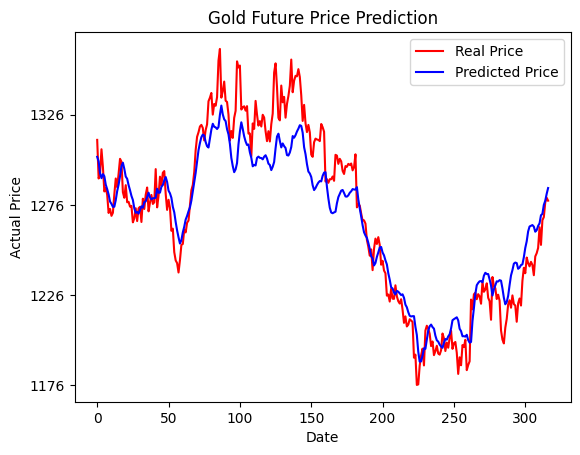

In [47]:
#I will use a plot to visualize both real price and predicted price, to check my  model's accuracy
#Define color, title, label
plt.plot(Actual_value, color='red', label='Real Price')
plt.plot(Predicted_value, color='blue', label='Predicted Price')
plt.title('Gold Future Price Prediction')
plt.xlabel('Date')
plt.ylabel('Actual Price')
plt.legend()

#Set y-axis tick positions and labels
plt.yticks(range(int(min(Actual_value)), int(max(Actual_value))+1, 50))

plt.show()

### **Comment**:


*   Based on the above predictions, it can be observed that there is generally a small difference between my predicted price and the actual value. However, noticeable gaps are observed for some middle values, specifically between the 100th and 175th timestamps, corresponding to the period between 2015 and 2016. These gaps may be attributed to significant historical events that occurred during that time, such as the Charlie Hebdo Attack in Paris, Amtrak Train Crash, and On-Air Shooting in Virginia. These events might have influenced the accuracy of my model. To achieve more precise and detailed forecasting in the future, it is essential to incorporate these factors into the analysis.

*   The presence of these gaps indicates that my current model is not sufficiently accurate in predicting future gold prices. This highlights the need for significant improvements in the model itself, as well as the data preprocessing and feature selection techniques employed.



## 8. Conclusion

*   My project is centered around predicting the adjusted close price of Gold Futures, taking into account several influential factors such as the EU to US exchange rate, key performance indices, and other future prices. Following a comprehensive data science approach, I meticulously executed each step of the process. While the results of my models successfully capture the overall trend of Gold Futures' price, there remains a slight deviation from the actual price. This discrepancy could potentially be attributed to objective factors and suggests that further improvements are required to enhance the accuracy of my model.

*   Undertaking this project has been an immensely valuable experience that has expanded my knowledge and sharpened my critical thinking skills. Throughout the project, I devoted considerable effort to conducting thorough research on multivariate time series problems. I explored various resources, including online platforms like YouTube and Google, to study different approaches and methodologies used by other experts in this field. Additionally, I allocated sufficient time for thoughtful contemplation to ensure the completion of my project with a calm and focused mindset.

*   Compared to my previous projects, this project presents a unique challenge that closely resembles a real-life scenario. I am delighted to have the opportunity to work on this project and have benefited greatly from interacting with ChatGPT. It has proven invaluable in helping me debug issues and gain valuable insights into writing efficient code and improving my model. ChatGPT has been like a reliable resource, providing me with answers to various academic questions.


*   Lastly, I would like to express my gratitude once again for giving me the opportunity to work on this project. While I acknowledge that there is room for improvement in my model, I am committed to dedicating additional time after completing the project to study relevant approaches and further improve the accuracy of my predictions.